#Implementation on transistor dataset

In [2]:
#Cloning git repo
!git clone https://github.com/OlgaChernytska/Visual-Inspection.git

Cloning into 'Visual-Inspection'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 110 (delta 2), reused 0 (delta 0), pack-reused 104
Receiving objects: 100% (110/110), 329.09 MiB | 46.39 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Checking out files: 100% (24/24), done.


In [ ]:
!gdown https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938113-1629952094/mvtec_anomaly_detection.tar.xz

Downloading...
From: https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938113-1629952094/mvtec_anomaly_detection.tar.xz
To: /content/mvtec_anomaly_detection.tar.xz
100% 5.26G/5.26G [00:46<00:00, 113MB/s]


In [3]:
!gdown https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938166-1629953277/transistor.tar.xz

Downloading...
From: https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938166-1629953277/transistor.tar.xz
To: /content/transistor.tar.xz
100% 403M/403M [00:21<00:00, 18.9MB/s]


In [ ]:
!tar -xvf /content/transistor.tar.xz

In [4]:
import shutil
import os 
shutil.rmtree("/content/transistor/ground_truth")

In [5]:
import shutil
pth ="/content/Visual-Inspection/utils/"
l =os.listdir(pth)
for i in l: 
   shutil.copy(pth+i,"/content/utils")
shutil.copy(pth+"constants.py","/content/utils")

'/content/utils/constants.py'

In [ ]:
!pip install Pillow==8.3.2
!pip install scikit-learn==0.24.2
!pip install torch==1.9.0

In [ ]:

!pip install torchvision==0.10.0
!pip install nb-black==1.0.7
!pip install numpy==1.20.1
!pip install matplotlib==3.3.4
!pip install seaborn==0.11.1

In [6]:
os.listdir("/content/utils")

['constants.py', '__pycache__', 'dataloader.py', 'helper.py', 'model.py']

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from utils.dataloader import get_train_test_loaders, get_cv_train_test_loaders
from utils.model import CustomVGG
from utils.helper import train, evaluate, predict_localize
from utils.constants import NEG_CLASS 
from utils.constants import INPUT_IMG_SIZE as input_size

## Parameters

In [8]:
data_folder = "/content"
subset_name = "transistor"
data_folder = os.path.join(data_folder, subset_name)

batch_size = 10
target_train_accuracy = 0.98
lr = 0.0001
epochs = 10
class_weight = [1, 3] if NEG_CLASS == 1 else [3, 1]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

heatmap_thres = 0.7
n_cv_folds = 5

# Data

In [9]:
train_loader, test_loader = get_train_test_loaders(
    root=data_folder, batch_size=batch_size, test_size=0.2, random_state=42,
)

Dataset /content/transistor: N Images = 313, Share of anomalies = 0.128


# Model Training

In [10]:
model = CustomVGG()

class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weight)
optimizer = optim.Adam(model.parameters(), lr=lr)

In [11]:
model = train(
    train_loader, model, optimizer, criterion, epochs, device, target_train_accuracy
)

Epoch 1/10: Loss = 0.5767, Accuracy = 0.8520
Epoch 2/10: Loss = 0.4475, Accuracy = 0.8680
Epoch 3/10: Loss = 0.3666, Accuracy = 0.8960
Epoch 4/10: Loss = 0.2346, Accuracy = 0.9360
Epoch 5/10: Loss = 0.1519, Accuracy = 0.9760
Epoch 6/10: Loss = 0.0771, Accuracy = 0.9840
Early Stopping


In [12]:
model_path = f"/content/Visual-Inspection/weights/{subset_name}_model.h5"
torch.save(model, model_path)
# model = torch.load(model_path, map_location=device)

# Evaluation

Accuracy: 0.9365
Balanced Accuracy: 0.7500



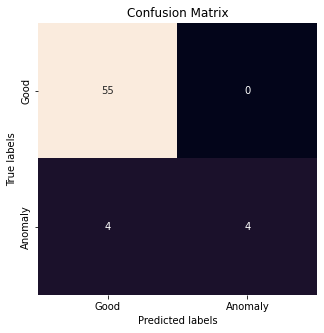

In [13]:
evaluate(model, test_loader, device)

# Cross Validation

In [14]:
cv_folds = get_cv_train_test_loaders(
    root=data_folder,
    batch_size=batch_size,
    n_folds=n_cv_folds,
)

class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weight)

for i, (train_loader, test_loader) in enumerate(cv_folds):
    print(f"Fold {i+1}/{n_cv_folds}")
    model = CustomVGG(input_size)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model = train(train_loader, model, optimizer, criterion, epochs, device)
    evaluate(model, test_loader, device)

Dataset /content/transistor: N Images = 313, Share of anomalies = 0.128
Fold 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


TypeError: ignored

# Visualization

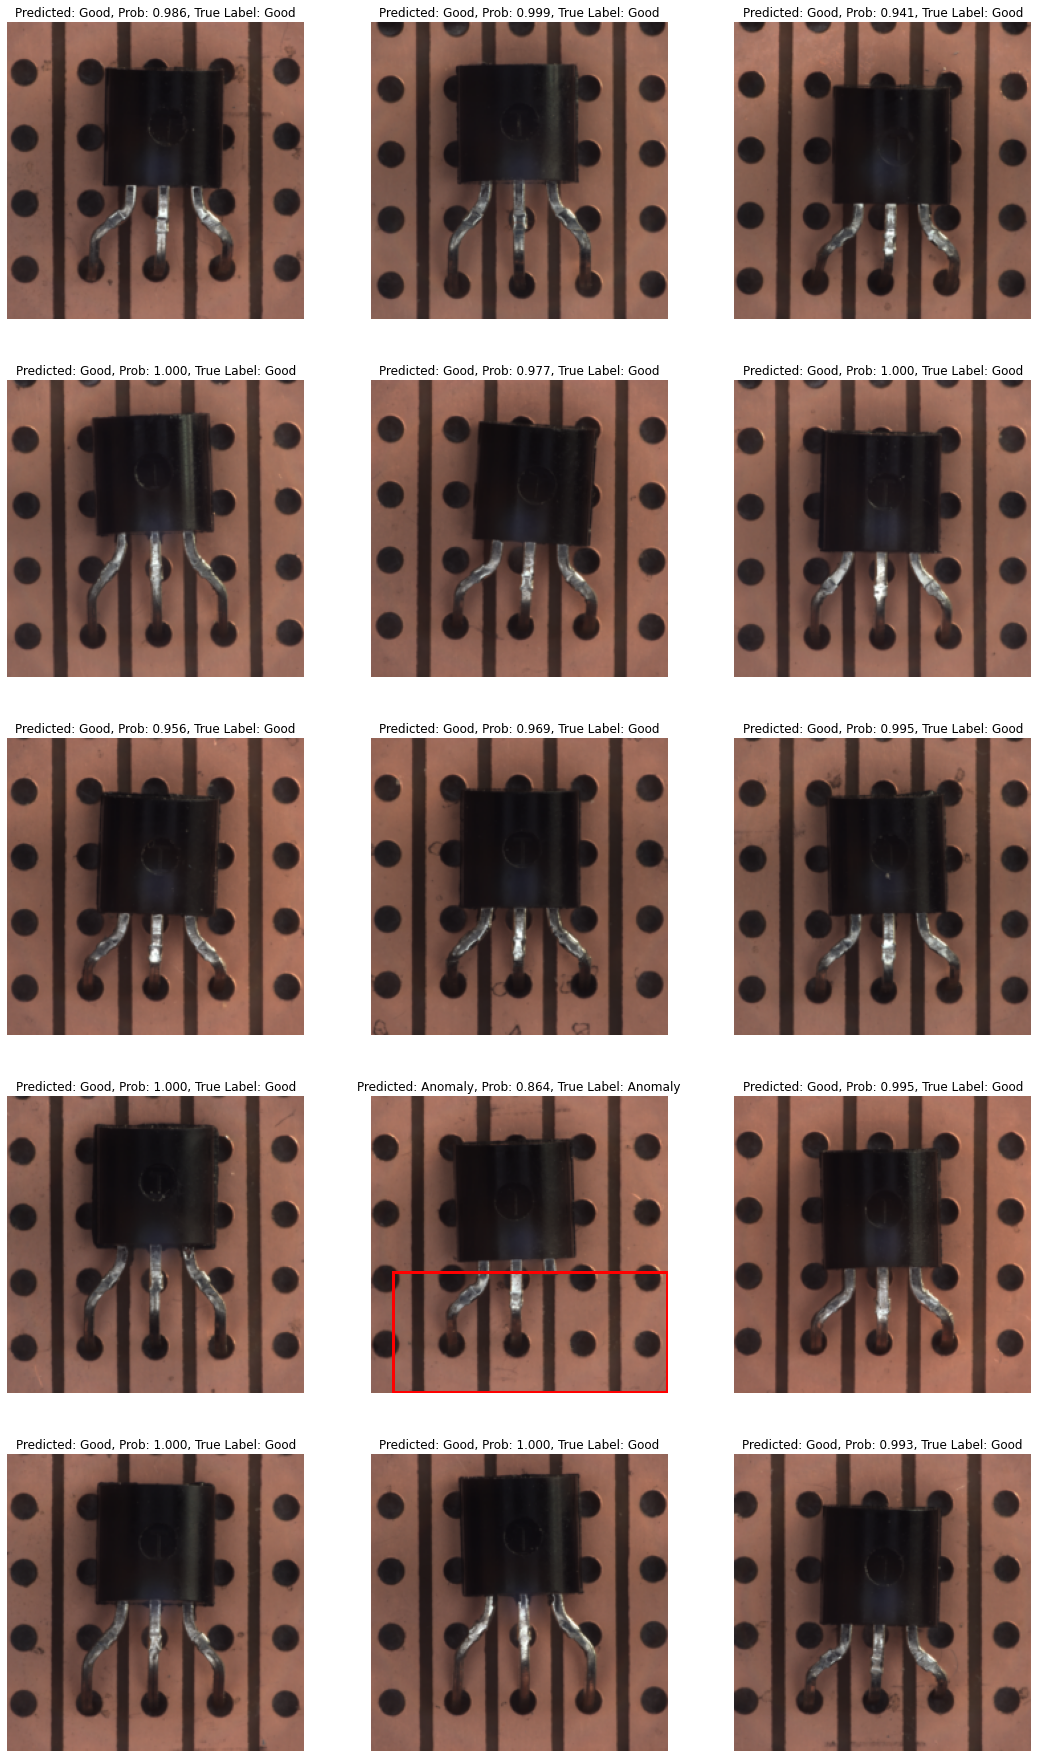

In [15]:
predict_localize(
    model, test_loader, device, thres=heatmap_thres, n_samples=15, show_heatmap=False
)

#Implementation 2

In [19]:
!mkdir /root/.kaggle
shutil.move("/content/kaggle.json","/root/.kaggle")
!kaggle datasets download -d akhatova/pcb-defects

mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 1.87G/1.88G [00:23<00:00, 75.1MB/s]
100% 1.88G/1.88G [00:24<00:00, 83.9MB/s]


In [21]:
!unzip /content/pcb-defects.zip

Archive:  /content/pcb-defects.zip
  inflating: PCB_DATASET/Annotations/Missing_hole/01_missing_hole_01.xml  
  inflating: PCB_DATASET/Annotations/Missing_hole/01_missing_hole_02.xml  
  inflating: PCB_DATASET/Annotations/Missing_hole/01_missing_hole_03.xml  
  inflating: PCB_DATASET/Annotations/Missing_hole/01_missing_hole_04.xml  
  inflating: PCB_DATASET/Annotations/Missing_hole/01_missing_hole_05.xml  
  inflating: PCB_DATASET/Annotations/Missing_hole/01_missing_hole_06.xml  
  inflating: PCB_DATASET/Annotations/Missing_hole/01_missing_hole_07.xml  
  inflating: PCB_DATASET/Annotations/Missing_hole/01_missing_hole_08.xml  
  inflating: PCB_DATASET/Annotations/Missing_hole/01_missing_hole_09.xml  
  inflating: PCB_DATASET/Annotations/Missing_hole/01_missing_hole_10.xml  
  inflating: PCB_DATASET/Annotations/Missing_hole/01_missing_hole_11.xml  
  inflating: PCB_DATASET/Annotations/Missing_hole/01_missing_hole_12.xml  
  inflating: PCB_DATASET/Annotations/Missing_hole/01_missing_hole